In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import svm, feature_selection, linear_model
from sklearn.model_selection import train_test_split


In [110]:
def markOutliers(df,columns):

    t = np.zeros(df.shape[0])
    z = np.zeros(df.shape[0])
    for column in columns:
        mean=np.mean(df[column])
        sd=np.std(df[column])
        threshold=2
        test=[]

        for i, x in enumerate(df[column]):
            if column=="SALE PRICE":
                if x<100000:
                    t[i]=1
            z[i]=(x-mean)/sd
            if z[i]>=threshold:
                test.append((x,z[i]))
                t[i]=1
        print(column,'\n', test)
    df['outlier']=t
    
    return df

In [111]:
def step1_clean():
    df = pd.read_csv("Manhattan12.csv")

    # Print shape
    print(df.shape)

    # Rename incorrect column names
    df.rename(columns={"APART\r\nMENT\r\nNUMBER":"APARTMENT NUMBER", "SALE\r\nPRICE":"SALE PRICE"}, inplace = True)
    numerical=['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE']
    categorical=['BOROUGH','NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BLOCK','LOT','EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER','ZIP CODE','YEAR BUILT','TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'SALE DATE'
    ]
    # df_num_man=df.filter(['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']).copy()

    #num_cols=pd.concat([num_cols,df_num_man], axis=1, join='inner')
    df[numerical]=df[numerical].replace('\$','', regex=True)
    df[numerical]=df[numerical].replace(',','', regex=True)


    df['SALE DATE']=pd.to_datetime(df['SALE DATE'], dayfirst=True)
    df[categorical]=df[categorical].replace(' ', '', regex=True)
    df[categorical]=df[categorical].replace('', np.NaN)

    df[numerical]=df[numerical].apply(pd.to_numeric)
    df[numerical]=df[numerical].replace(0, np.NaN)


    df.drop(columns=['BOROUGH', 'EASE-MENT', 'APARTMENT NUMBER'], inplace=True)
    df.drop_duplicates(inplace=True)
    df.dropna(inplace=True)
    print(df.shape)

    df=markOutliers(df, numerical)
    df=df[df.outlier==0]
    df=df.drop('outlier', axis=1)
    print(df.shape)
    return df

In [112]:
def normalize(df,num_cols):
    #select numerical columns
    df_norm=df.copy()
    # num_cols.drop('SALE PRICE', axis='columns', inplace=True)
    df_norm[num_cols]=df_norm[num_cols]/df_norm[num_cols].abs().max()#((num_cols-num_cols.min())/(num_cols.max()-num_cols.min()))
    return df_norm

In [113]:
df = step1_clean()
df.reset_index(drop=True,inplace=True)
numerical=['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET', 'Log Price']
categorical=['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BLOCK','LOT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'ZIP CODE','YEAR BUILT','TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'SALE DATE']


df['Log Price']=np.log(df['SALE PRICE'])
df.drop(columns=['SALE PRICE',], inplace=True)
dfnorm=normalize(df, numerical)

(27395, 21)
(470, 18)
RESIDENTIAL UNITS 
 [(538.0, 11.111483409328216), (117.0, 2.0741514864081014), (522.0, 10.768021863564028), (120.0, 2.138550526238886), (397.0, 8.084728537281336), (165.0, 3.104536123700656), (188.0, 3.5982620957366716), (163.0, 3.0616034304801327), (128.0, 2.3102812991209785), (180.0, 3.4265313228545793), (209.0, 4.0490553745521645), (274.0, 5.444367904219165)]
COMMERCIAL UNITS 
 [(63.0, 18.4892272770799), (12.0, 2.988308182553469), (17.0, 4.508006132997237), (10.0, 2.3804290023759616)]
TOTAL UNITS 
 [(119.0, 2.036138271039512), (550.0, 11.131790234002308), (119.0, 2.036138271039512), (526.0, 10.625303813790923), (125.0, 2.1627598760923585), (398.0, 7.924042905996868), (173.0, 3.175732716515129), (195.0, 3.6400119350422324), (165.0, 3.0069039097780004), (130.0, 2.2682778803030637), (181.0, 3.3445615232522576), (213.0, 4.019876750200772), (277.0, 5.370507204097799)]
LAND SQUARE FEET 
 [(150322.0, 18.199846915126173), (35373.0, 3.882155805469149), (40873.0, 4.56721

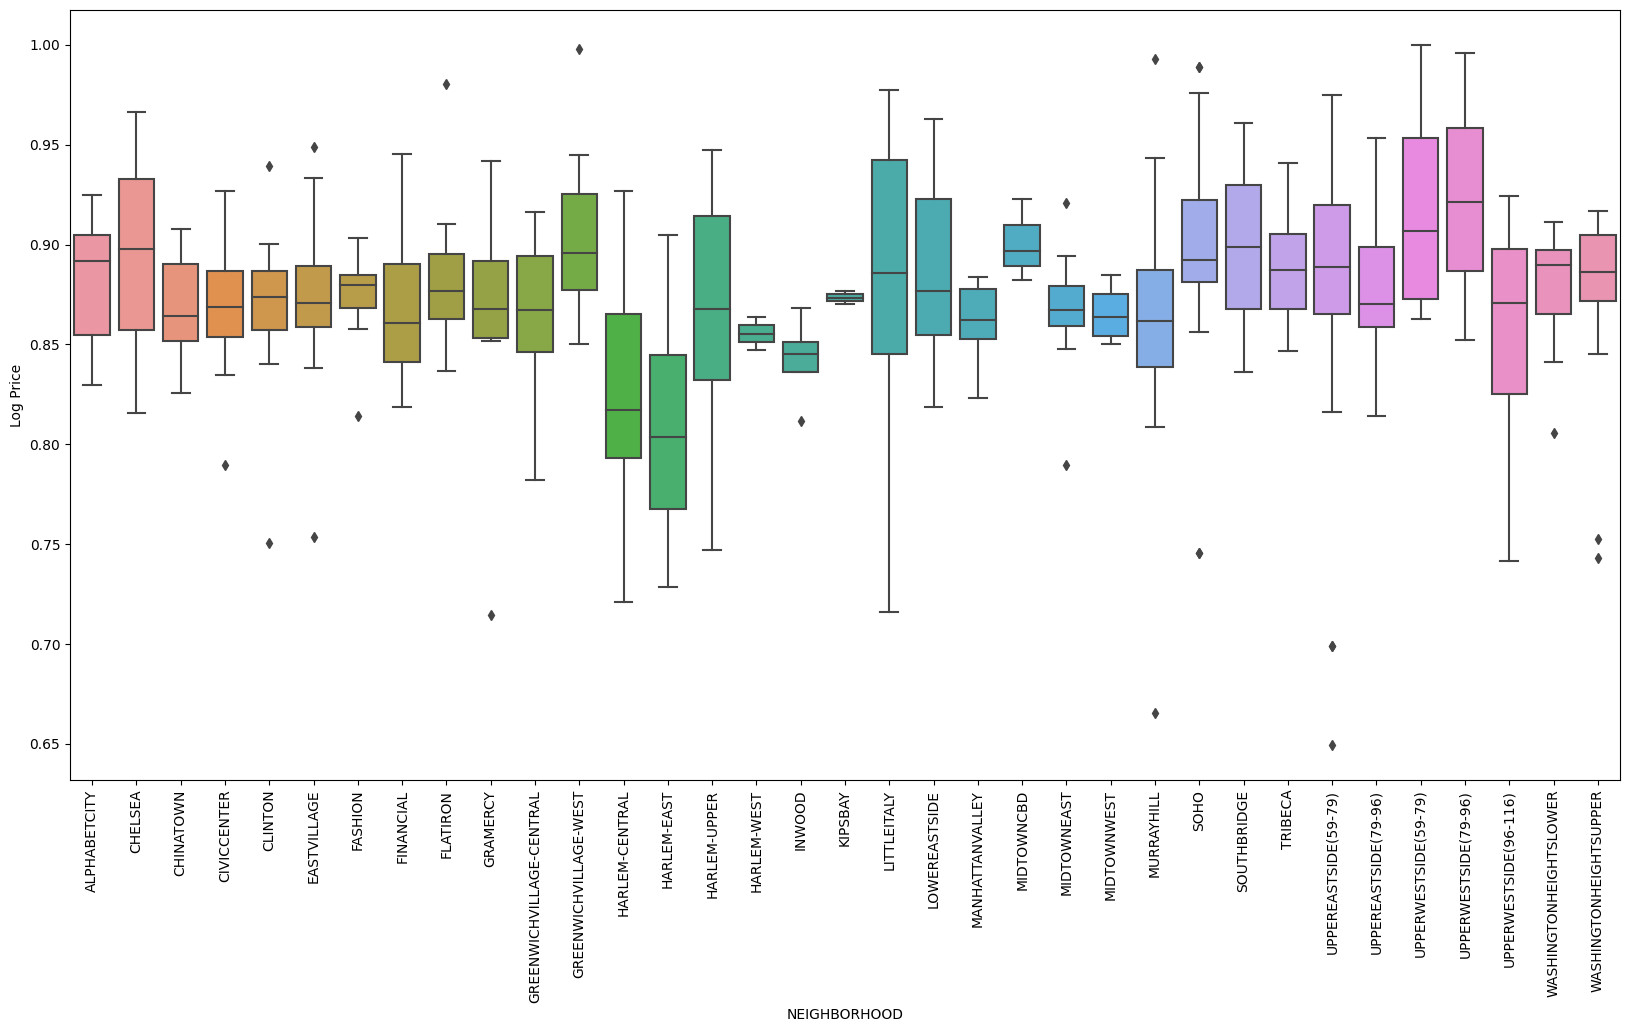

In [114]:
plt.figure(figsize=[20,10])
sns.boxplot( y=dfnorm["Log Price"], x=dfnorm["NEIGHBORHOOD"] )
plt.xticks(rotation=90)
plt.show()



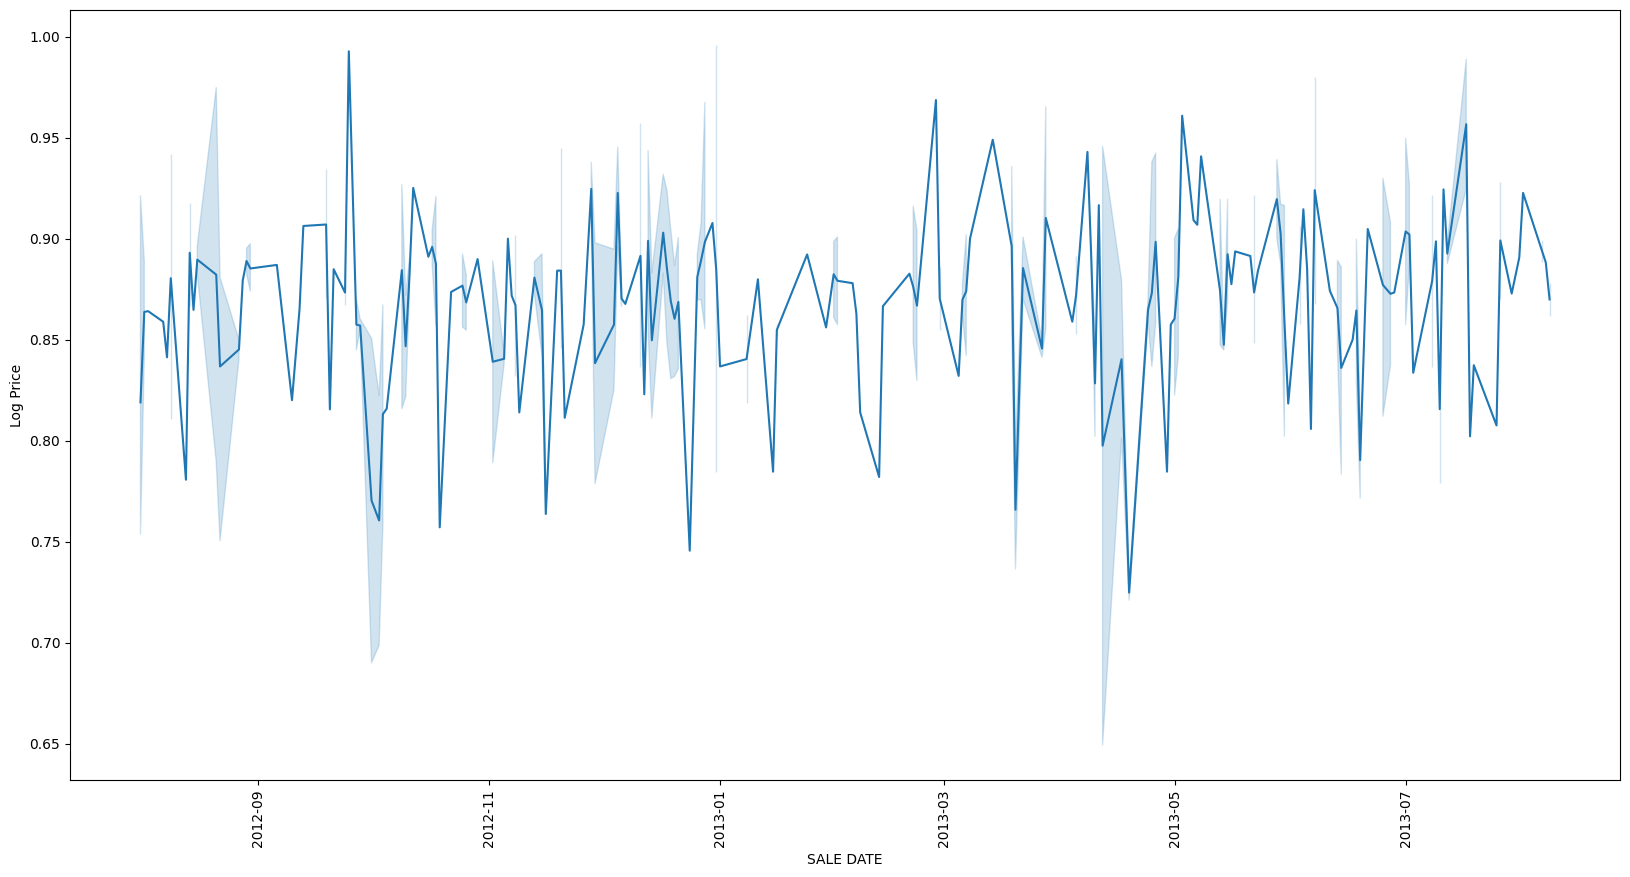

In [115]:
fig, axes=plt.subplots(figsize=[20,10])
sns.lineplot(y="Log Price", x="SALE DATE", data=dfnorm)
plt.xticks(rotation = 'vertical')
plt.show()


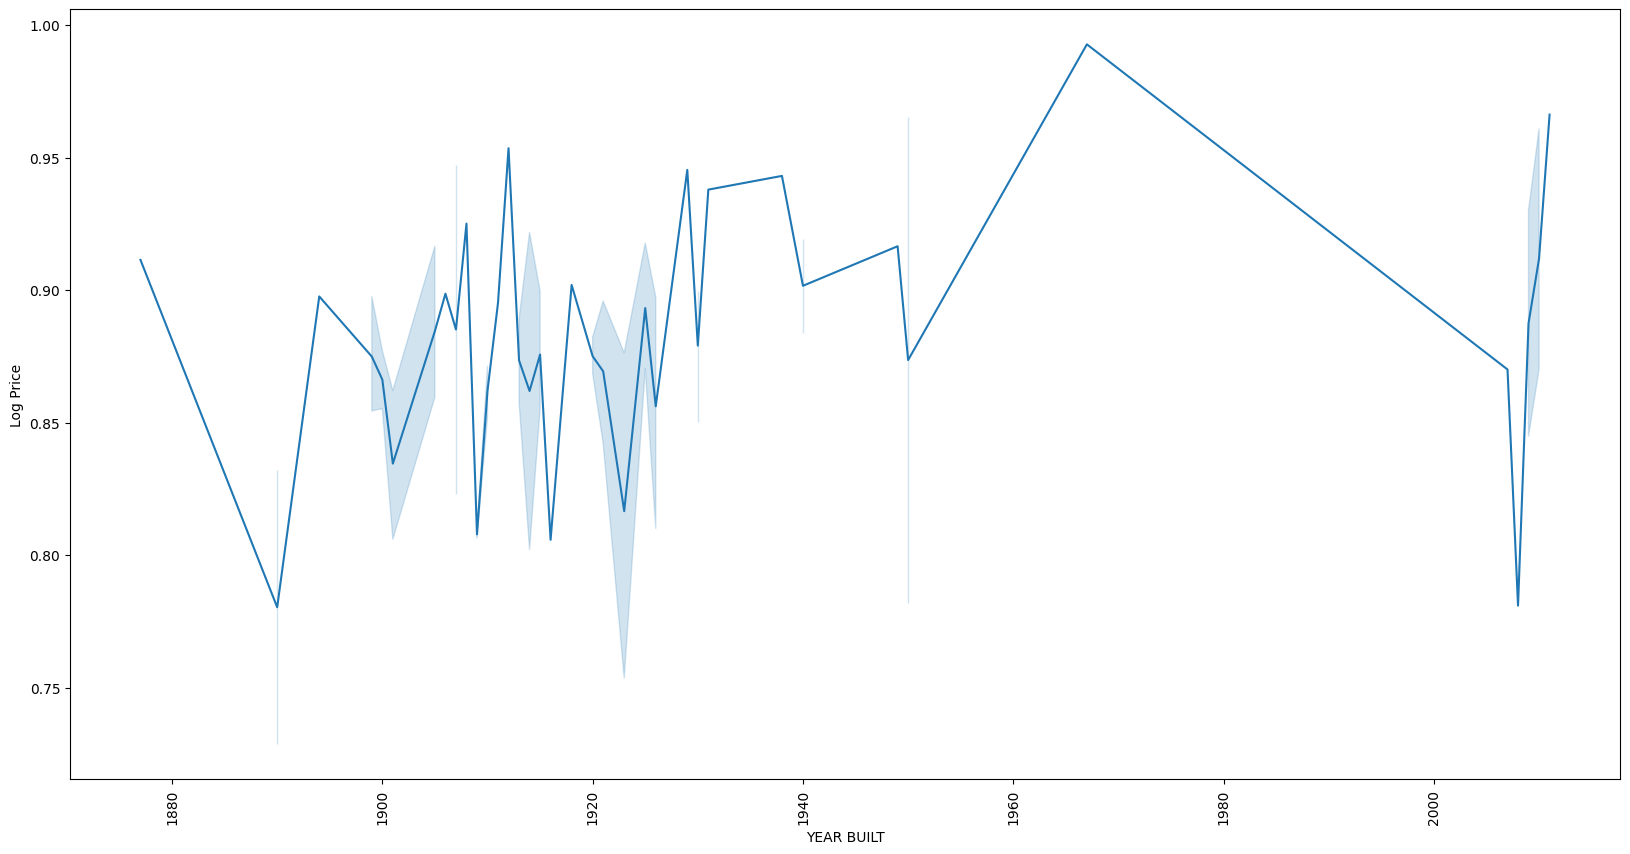

In [116]:
fig, axes=plt.subplots(figsize=[20,10])
sns.lineplot(y="Log Price", x="YEAR BUILT", data=dfnorm)
plt.xticks(rotation = 'vertical')
plt.show()

C:\Users\zacha\AppData\Local\Temp\ipykernel_9164\2831284990.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  matrix=scatter_matrix(dfnorm, alpha=0.3, diagonal='kde', ax = ax)


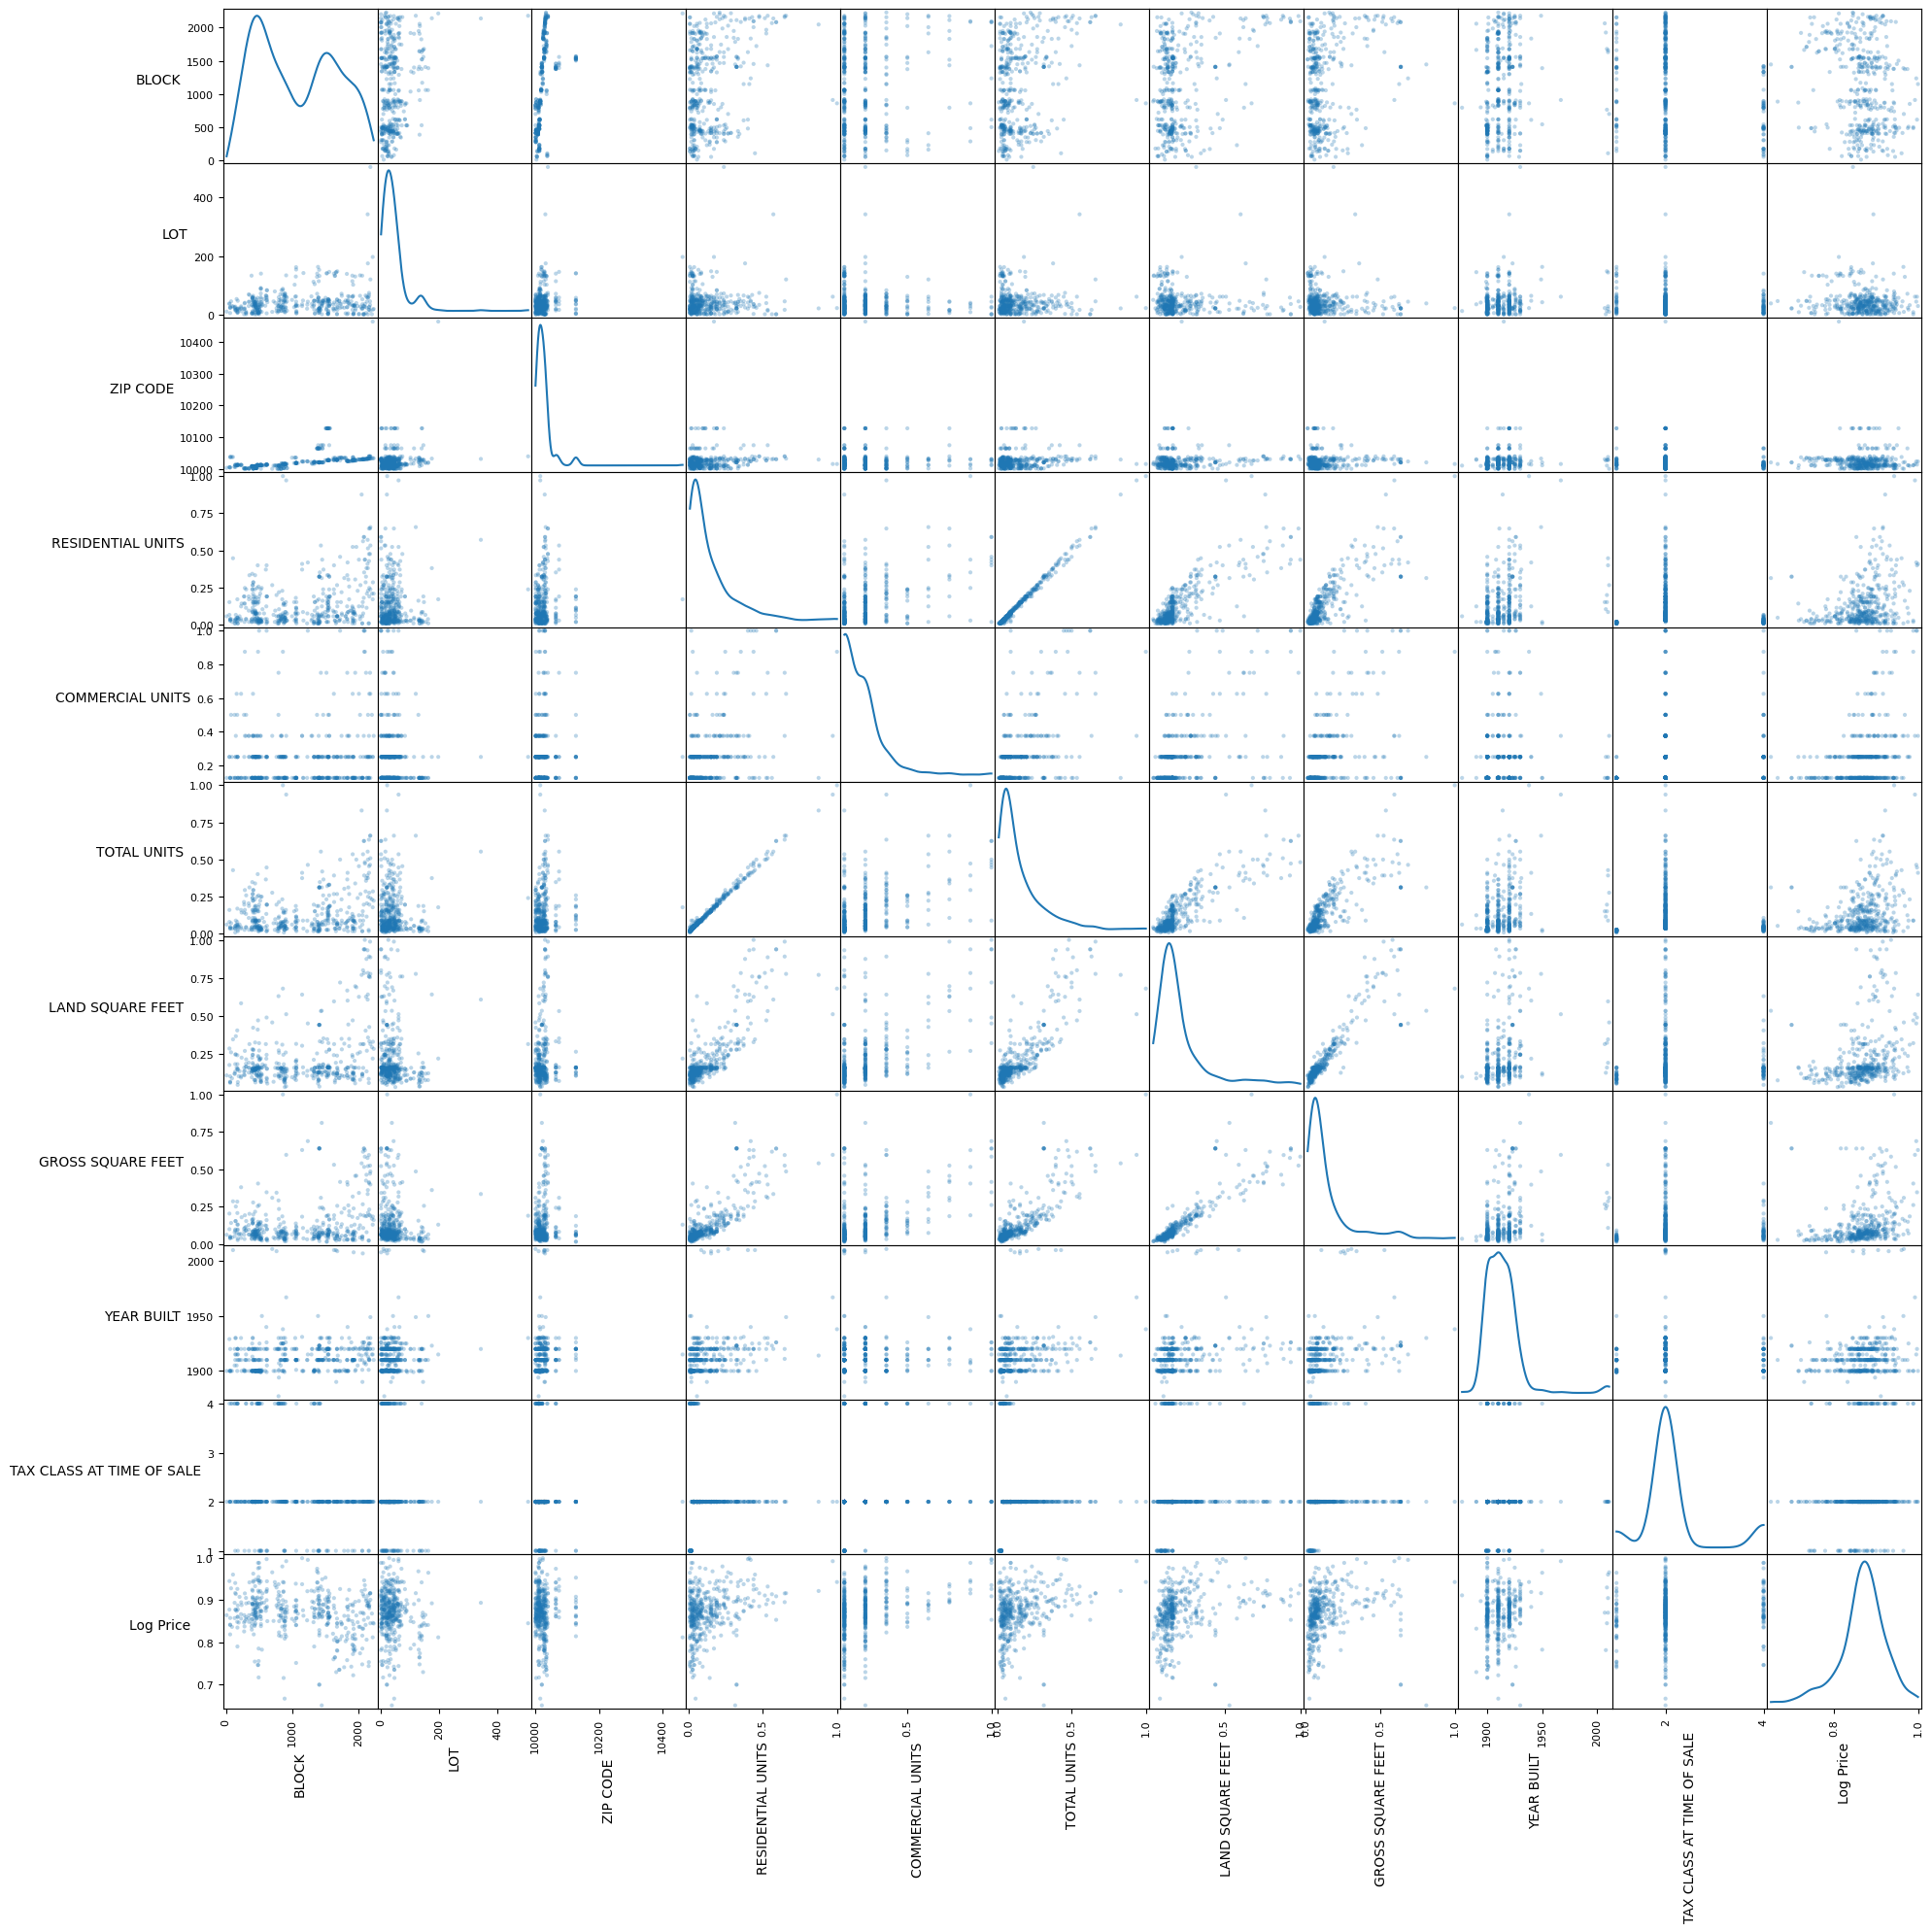

In [117]:
fig = plt.figure(1, figsize=[20, 20])
fig.clf()
ax = fig.gca()
matrix=scatter_matrix(dfnorm, alpha=0.3, diagonal='kde', ax = ax)
for ax in matrix.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()


In [118]:
def regressionFit(df, column):
    d = np.polyfit(df[column],df['Log Price'],1)
    f = np.poly1d(d)
    dfreg=df.copy()
    dfreg.insert(len(dfreg.columns), 'reg', f(dfreg[column]))
    ax=dfreg.plot.scatter(y="Log Price", x=column)
    dfreg.plot(y="reg", x=column, color='Red', legend=False, ax=ax)



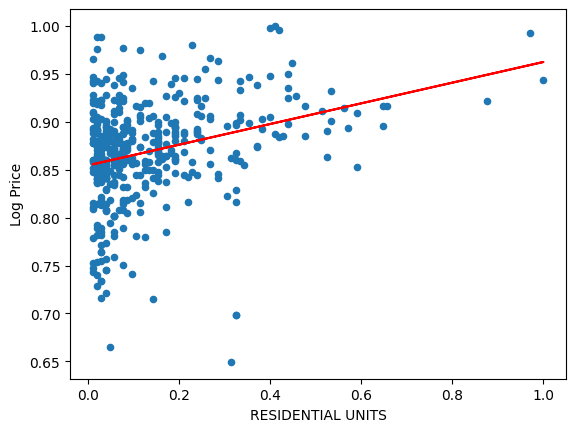

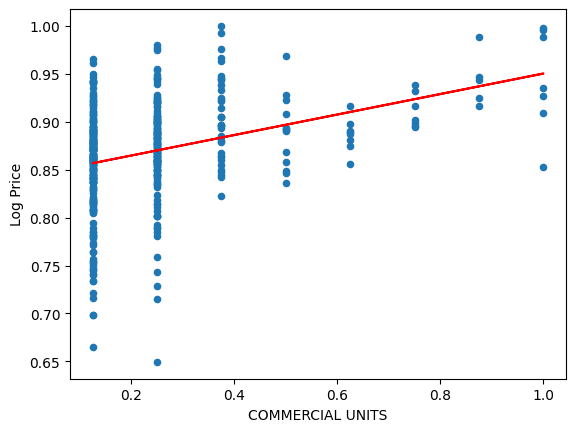

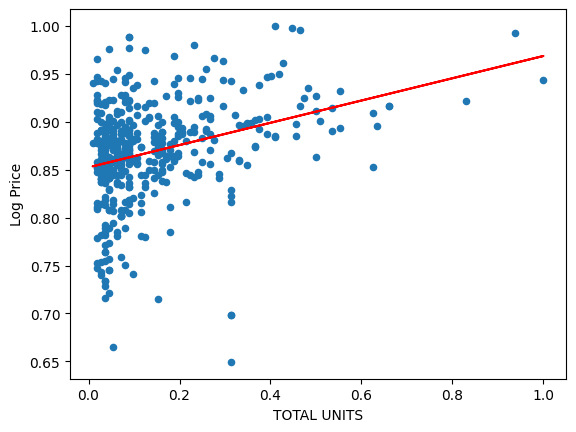

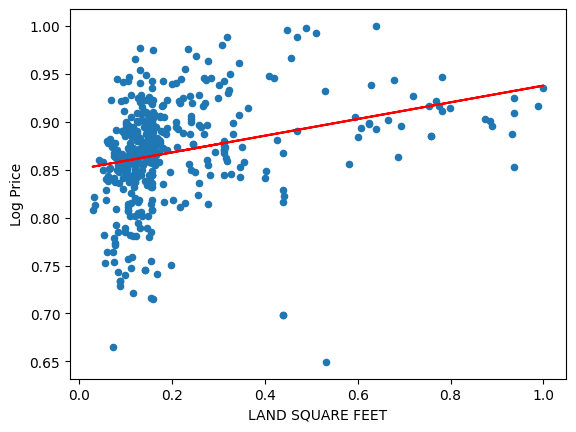

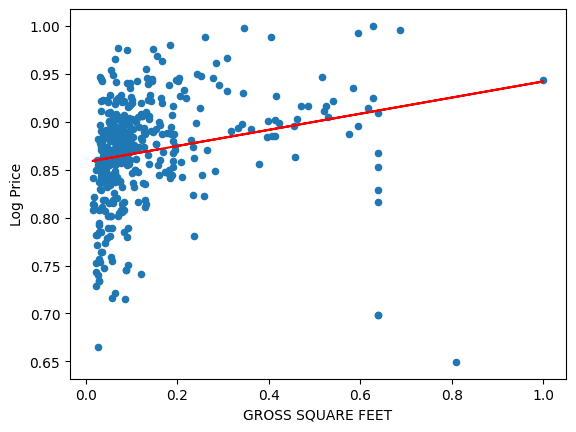

In [119]:
for col in numerical:
    if col=="Log Price":
        continue

    regressionFit(dfnorm, col)

In [120]:
def convertNeighborhood(df):
    n = np.zeros(df.shape[0])
    for i, r in df.iterrows():
        if r["Log Price"]<.80:
            n[i]=1
        elif r["Log Price"]>.90:
            n[i]=3
        else:
            n[i]=2
    return n

dfnorm["NCat"]=convertNeighborhood(dfnorm)


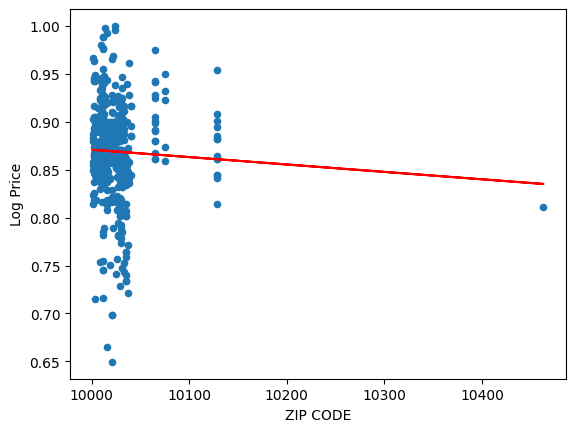

In [121]:
regressionFit(dfnorm, "ZIP CODE")

In [138]:
feature_cols=numerical.copy()
feature_cols.remove('Log Price')
feature_cols.append('NCat')
XO=dfnorm[feature_cols]
YO=dfnorm['Log Price']
est=svm.SVR(kernel="linear")
sel= feature_selection.RFE(est, n_features_to_select=1, step=1)
sel = sel.fit(XO, YO)
select_features = np.array(feature_cols)[sel.ranking_==1].tolist()
print(select_features)
X = dfnorm[select_features]
Y = dfnorm['Log Price']
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2)
lm = linear_model.LinearRegression()
lm.fit(trainX, trainY)
print("Y-axis intercept {:6.4f}".format(lm.intercept_))
print("Weight coefficients:")
for feat, coef in zip(select_features, lm.coef_):
    print(" {:>20}: {:6.4f}".format(feat, coef))
# The value of R^2
print("R squared for the training data is {:4.3f}".format(lm.score(trainX,
trainY)))
print("Score against test data: {:4.3f}".format(lm.score(testX, testY)))

['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'NCat']
Y-axis intercept 0.6915
Weight coefficients:
    RESIDENTIAL UNITS: 0.9107
     COMMERCIAL UNITS: 0.1045
          TOTAL UNITS: -0.9063
     LAND SQUARE FEET: 0.0039
    GROSS SQUARE FEET: -0.0797
                 NCat: 0.0783
R squared for the training data is 0.771
Score against test data: 0.706


In [131]:
def mse(df, pred, obs):
    n = df.shape[0]
    return sum((df[pred]-df[obs])**2)/n
dfnorm['pred'] = lm.predict(X)
print("Mean Squared error: {}".format(mse(dfnorm,'pred', 'Log Price')))

Mean Squared error: 0.0006920211393504664


0.24411680717041484


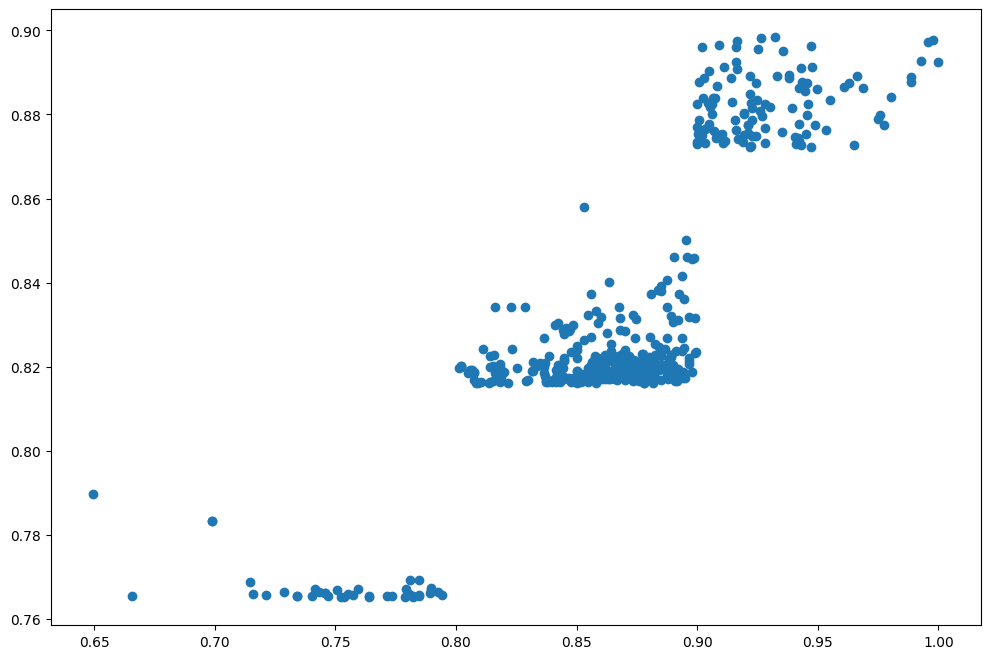

In [136]:


rbf = svm.SVR(kernel="rbf", C=1e2, tol=1e-4)
rbf.fit(trainX, trainY)
print(rbf.score(testX, testY))
predicted = rbf.predict(dfnorm[select_features])
plt.figure(figsize=(12, 8))
plt.scatter(dfnorm['Log Price'], predicted)
plt.xlabel = "Actual Prices"
plt.ylabel = "Predicted Prices"
plt.title="Plot of predicted vs actual prices"
plt.show()

